# Introducción

Una vez preprocesado los datos (limpieza, solucion de valores faltantes, etc.) podemos proceder con el análisis y encontrar insights.
El alcande temporal de los datos esta limitado entre el 21-1 y 24-1

# Carga de datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = r'datasets/admission-data-clean.csv'
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42033 entries, 0 to 42032
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   IDHASH               42033 non-null  object 
 1   COLEGIO              42033 non-null  object 
 2   COLEGIO_DEPA         42033 non-null  object 
 3   COLEGIO_PROV         42033 non-null  object 
 4   COLEGIO_DIST         42033 non-null  object 
 5   COLEGIO_PAIS         42033 non-null  object 
 6   COLEGIO_ANIO_EGRESO  42033 non-null  int64  
 7   ESPECIALIDAD         42033 non-null  object 
 8   ANIO_POSTULA         42033 non-null  int64  
 9   CICLO_POSTULA        42033 non-null  int64  
 10  DOMICILIO_DEPA       42033 non-null  object 
 11  DOMICILIO_PROV       42033 non-null  object 
 12  DOMICILIO_DIST       42033 non-null  object 
 13  ANIO_NACIMIENTO      42033 non-null  int64  
 14  NACIMIENTO_PAIS      42033 non-null  object 
 15  NACIMIENTO_DEPA      42033 non-null 

# Análisis de calificaciones e ingresantes

In [6]:
# Combinando ANIO_POSTULA Y CICLO_POSTULA en ANIO_CICLO, para el análisis
df['ANIO_CICLO'] = df.ANIO_POSTULA.astype(str) + '-' + df.CICLO_POSTULA.astype(str)

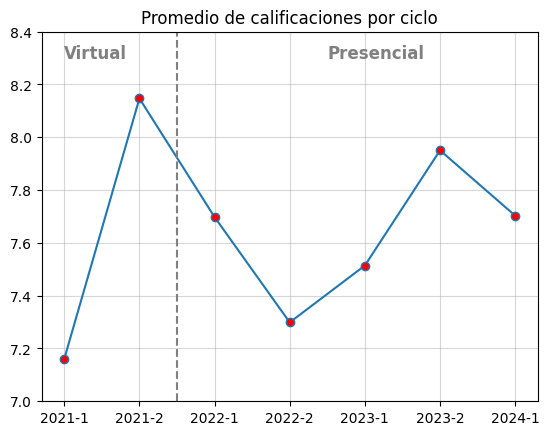

In [7]:
# Evolución de calificaciones por ciclo
temp = df.groupby('ANIO_CICLO')['CALIF_FINAL'].mean().reset_index()

plt.plot(temp.ANIO_CICLO, temp.CALIF_FINAL, '-o', markerfacecolor='red')
plt.axvline(x=1.5, color='grey', linestyle='--')

plt.ylim(7, 8.4)
fontdict = {'fontsize': 12, 'fontweight': 'bold', 'color': 'grey'}
plt.text(x=0, y=8.3, s='Virtual', fontdict=fontdict, )
plt.text(x=3.5, y=8.3, s='Presencial', fontdict=fontdict)


plt.title('Promedio de calificaciones por ciclo')
plt.grid(True, alpha=0.5);

Durante los ciclos del 2021, fue donde se presento el mayor y menor promedio de calificaciones en comparacion del 2022 en adelante.
Hay que tener en cuenta que durante el 2021 se llevo el proceso de admision de manera virtual (debido a las restricciones por el COVID-19), esto puede haber influenciado en las calificaciones.

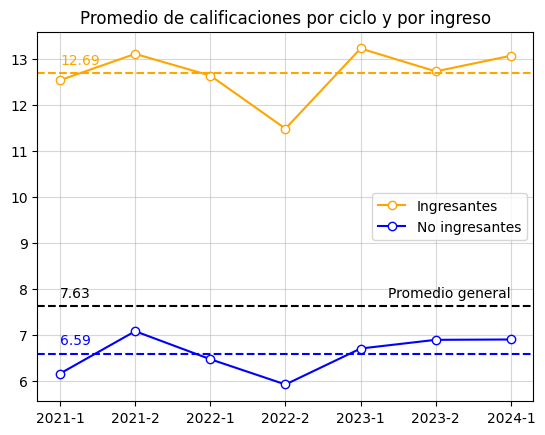

In [8]:
calif_ingresantes = df[df['INGRESO']=='SI'].groupby('ANIO_CICLO')['CALIF_FINAL'].mean().reset_index()
mean_ingresantes = calif_ingresantes.CALIF_FINAL.mean()
calif_no_ingresantes = df[df['INGRESO']=='NO'].groupby('ANIO_CICLO')['CALIF_FINAL'].mean().reset_index()
mean_no_ingresantes = calif_no_ingresantes.CALIF_FINAL.mean()

plt.plot(calif_ingresantes.ANIO_CICLO, calif_ingresantes.CALIF_FINAL, '-o',
         color='orange', label='Ingresantes', markerfacecolor='w')
plt.axhline(y=mean_ingresantes, color='orange', linestyle='--')
plt.text(x=0, y=mean_ingresantes+0.2, s=f'{mean_ingresantes:.2f}',
         fontdict={'color':'orange', 'fontsize':10})

plt.plot(calif_no_ingresantes.ANIO_CICLO, calif_no_ingresantes.CALIF_FINAL, '-ob',
         label='No ingresantes', markerfacecolor='w')
plt.axhline(y=mean_no_ingresantes, color='blue', linestyle='--')
plt.text(x=0, y=mean_no_ingresantes+0.2, s=f'{mean_no_ingresantes:.2f}',
         fontdict={'color':'blue', 'fontsize':10})

plt.axhline(y=df['CALIF_FINAL'].mean(), color='black', linestyle='--')
plt.text(x=0, y=df['CALIF_FINAL'].mean()+0.2, s=f'{df["CALIF_FINAL"].mean():.2f}',
         fontdict={'color':'black', 'fontsize':10})
plt.text(x=6, y=df['CALIF_FINAL'].mean()+0.2, s='Promedio general', ha = 'right',
         fontdict={'color':'black', 'fontsize':10})


plt.legend()
plt.title('Promedio de calificaciones por ciclo y por ingreso')
plt.grid(True, alpha=0.5);

El promedio de notas de las calificaciones siguen una tendencia similar a largo del tiempo tanto en las notas de los ingresantes como en las de no ingresantes, con un promedio de casi el doble para los ingresantes en comparación con los no ingresantes.  

El promedio general (7.3) está mas cerca de los no ingresantes debido principalmente a que la relacion de no ingresantes e ingresantes es aproximadamente de 4 a 1.

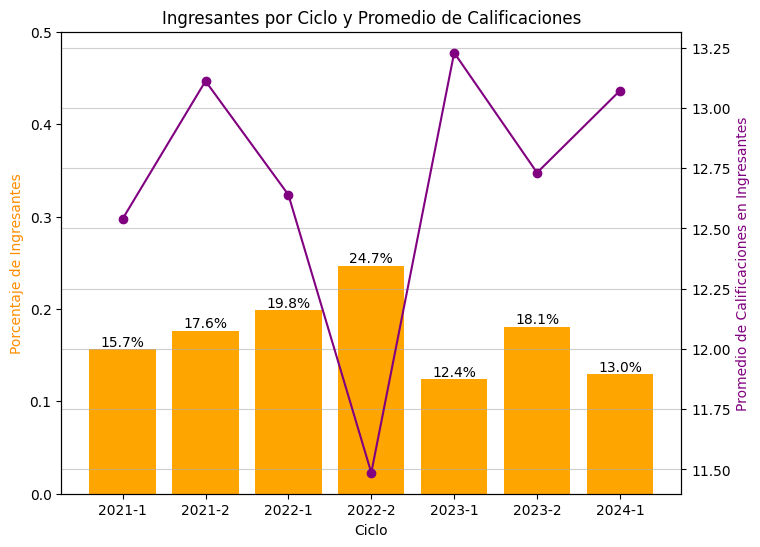

In [9]:
# Ingresantes por ciclo
temp = df.copy()
temp = temp.groupby('ANIO_CICLO')['INGRESO'].value_counts(normalize=True).unstack()

fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(temp.index, temp.SI, color='orange')
for i, porcentaje in enumerate(temp.SI):
    ax1.text(x=i, y=porcentaje, s=f'{porcentaje*100:.1f}%',
             ha='center', va='bottom',
             fontdict={'fontsize':10, 'color':'black'})
ax1.set(
    xlabel='Ciclo',
    ylim=(0, 0.5)
)
ax1.set_ylabel('Porcentaje de Ingresantes', color='darkorange')

# Promedio de calificaciones en ingresantes
temp = df[df['INGRESO']=='SI']
temp = temp.groupby('ANIO_CICLO')['CALIF_FINAL'].mean()
ax2 = ax1.twinx()
ax2.plot(temp.index, temp.values, '-o', color='purple')
ax2.set_ylabel('Promedio de Calificaciones en Ingresantes', color='purple')

plt.title('Ingresantes por Ciclo y Promedio de Calificaciones')
plt.grid(True, alpha=0.6);

El gráfico de lineas nos muestra el promedio de calificaciones por ciclo para los que ingresaron y el gráfico de barras nos muestra el porcentaje de ingresantes por ciclo.  

Durante el ciclo 2022-2 se presentó el mayor ratio de ingresantes (un 24.7 % de todos los postulantes) y, aunque parezca contradictorio, también se presentó el menor promedio de calificaciones en los ingresantes (11.5). Este comportamiento podría deverse a que en ese ciclo se aplicaron ciertas modificaciones en los requerimientos de ingreso (calificaciones minimas) para ciertas especialidades, o que se disponían de mas vacantes para las distintas especialidades.  

Es curioso que este comportamiento se vea reflejado en los siguientes ciclos, donde el incremento y decremeto del promedio de clasificaciones y porcentaje de ingresante muestren una relación inversa.

Tambien hay que tener en cuenta la gran caida en el porcentaje de ingresantes (12%) del 22-2 al 23-1.

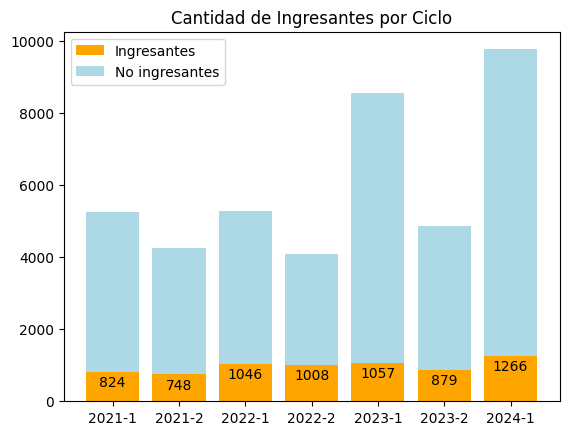

In [16]:
# Grafico de barras de la cantidad de ingresantes por ciclo
temp = df.groupby('ANIO_CICLO')['INGRESO'].value_counts().unstack()

plt.bar(temp.index, temp.SI, color='orange', label='Ingresantes')
for i, cantidad in enumerate(temp.SI):
    plt.text(x=i, y=cantidad-100, s=f'{cantidad}',
             ha='center', va='top',
             fontdict={'fontsize':10, 'color':'black'})

plt.bar(temp.index, temp.NO, color='lightblue', bottom=temp.SI, label='No ingresantes')

plt.legend()
plt.title('Cantidad de Ingresantes por Ciclo');

Observamos un crecimiento en la cantidad de postulantes en los comienzos de año, mientras que el numero de postulantes durante mediados de año permanecen similares.

La cantidad de ingresantes permanecieron iguales durante los ciclos 22-1, 22-2 y 22-3, mientras que en el 21-2 y el 23-2 es menor, y teniendo en cuenta que hay menos postulantes en mitad de año, podría indicar un ligero aumento de vacantes para el ciclo de mitad de año durante el 2022, lo que llevo a un ratio mas alto de ingresantes para este ciclo.